In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [91]:


data_frame = pd.read_csv('../data/AB_NYC_2019.csv') 
data_frame.head()

                         

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


`Now first seperating the dependent and independent features`

In [92]:
data_frame.shape, 

# we take X as independent features and y as the dependent features(ouput variable)

X = data_frame.drop('price', axis = 1)
y = data_frame['price']

# Seperate the numeric and non_numeric features from the matrix X
numeric_cols = X.select_dtypes(include = 'number')
categorical_cols = X.select_dtypes(exclude = 'number')


In [93]:
X.shape, y.shape, numeric_cols

((48895, 15),
 (48895,),
              id   host_id  latitude  longitude  minimum_nights  \
 0          2539      2787  40.64749  -73.97237               1   
 1          2595      2845  40.75362  -73.98377               1   
 2          3647      4632  40.80902  -73.94190               3   
 3          3831      4869  40.68514  -73.95976               1   
 4          5022      7192  40.79851  -73.94399              10   
 ...         ...       ...       ...        ...             ...   
 48890  36484665   8232441  40.67853  -73.94995               2   
 48891  36485057   6570630  40.70184  -73.93317               4   
 48892  36485431  23492952  40.81475  -73.94867              10   
 48893  36485609  30985759  40.75751  -73.99112               1   
 48894  36487245  68119814  40.76404  -73.98933               7   
 
        number_of_reviews  reviews_per_month  calculated_host_listings_count  \
 0                      9               0.21                               6   
 1       

In [94]:
categorical_cols

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,NaN
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room,NaN


In [95]:
numeric_cols

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,1,0,NaN,6,2


`# Now since we have 9 numeric columns, we will work something, about missing values, nan values and so on, so that we prepared the data set in good mathematical format for calculation later on for the model.`

In [96]:
numeric_cols.shape, numeric_cols.isna().sum()

((48895, 9),
 id                                    0
 host_id                               0
 latitude                              0
 longitude                             0
 minimum_nights                        0
 number_of_reviews                     0
 reviews_per_month                 10052
 calculated_host_listings_count        0
 availability_365                      0
 dtype: int64)

In [97]:
# now checking the feature col of reviews per month 
numeric_cols['reviews_per_month'].isna().sum()

np.int64(10052)

In [98]:
numeric_cols['reviews_per_month'] = numeric_cols['reviews_per_month'].fillna(0)

In [99]:
numeric_cols.isna().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [100]:
# Now its time to work with the numeric columns.


# Drop ids, they dont carry any meaning
numeric_cols = numeric_cols.drop(['id', 'host_id'], axis = 1, errors = 'ignore')

In [101]:
numeric_cols

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,9,0.21,6,365
1,40.75362,-73.98377,1,45,0.38,2,355
2,40.80902,-73.94190,3,0,0.00,1,365
3,40.68514,-73.95976,1,270,4.64,1,194
4,40.79851,-73.94399,10,9,0.10,1,0
...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,9
48891,40.70184,-73.93317,4,0,0.00,2,36
48892,40.81475,-73.94867,10,0,0.00,1,27
48893,40.75751,-73.99112,1,0,0.00,6,2


In [102]:
numeric_cols['reviews_per_month'].isna().sum()

np.int64(0)

In [103]:
categorical_cols.shape

(48895, 6)

In [104]:
categorical_cols.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


In [105]:
# drop the host_name and name
categorical_cols = categorical_cols.drop(['name', 'host_name'], axis = 1, errors = 'ignore')

In [106]:
categorical_cols

,neighbourhood_group,neighbourhood,room_type,last_review
0,Brooklyn,Kensington,Private room,2018-10-19
1,Manhattan,Midtown,Entire home/apt,2019-05-21
2,Manhattan,Harlem,Private room,NaN
3,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Manhattan,East Harlem,Entire home/apt,2018-11-19
...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,NaN
48891,Brooklyn,Bushwick,Private room,NaN
48892,Manhattan,Harlem,Entire home/apt,NaN
48893,Manhattan,Hell's Kitchen,Shared room,NaN


In [107]:
# Now convert the date time and extract useful features
from datetime import datetime
import numpy

categorical_cols['last_review'] = pd.to_datetime(categorical_cols['last_review'], errors = 'coerce')

categorical_cols['last_review_year'] = categorical_cols['last_review'].dt.year
categorical_cols['days_since_last_review'] = (datetime.now()- categorical_cols['last_review']).dt.days


# Replace the Nan( no last review) with a large number( eg, never reviewed)
categorical_cols['days_since_last_review'] = categorical_cols['days_since_last_review'].fillna(categorical_cols['days_since_last_review'].max())
categorical_cols['last_review_year'] = categorical_cols['last_review_year'].fillna(categorical_cols['last_review_year'].max())

In [108]:
# drp the original data column 

categorical_cols = categorical_cols.drop('last_review', axis = 1) 

In [109]:
categorical_cols

,neighbourhood_group,neighbourhood,room_type,last_review_year,days_since_last_review
0,Brooklyn,Kensington,Private room,2018.0,2564.0
1,Manhattan,Midtown,Entire home/apt,2019.0,2350.0
2,Manhattan,Harlem,Private room,2019.0,5326.0
3,Brooklyn,Clinton Hill,Entire home/apt,2019.0,2305.0
4,Manhattan,East Harlem,Entire home/apt,2018.0,2533.0
...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,2019.0,5326.0
48891,Brooklyn,Bushwick,Private room,2019.0,5326.0
48892,Manhattan,Harlem,Entire home/apt,2019.0,5326.0
48893,Manhattan,Hell's Kitchen,Shared room,2019.0,5326.0


In [110]:
categorical_cols.isna().sum()

neighbourhood_group       0
neighbourhood             0
room_type                 0
last_review_year          0
days_since_last_review    0
dtype: int64

In [111]:
numeric_cols.isna().sum(), categorical_cols.isna().sum(),

(latitude                          0
 longitude                         0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64,
 neighbourhood_group       0
 neighbourhood             0
 room_type                 0
 last_review_year          0
 days_since_last_review    0
 dtype: int64)

In [118]:
import pandas as pd

# One-hot encode 'neighbourhood_group' and 'room_type'
one_hot_cols = ['neighbourhood_group', 'room_type']
categorical_one_hot = pd.get_dummies(categorical_cols[one_hot_cols], drop_first=True)



In [119]:
# Frequency encoding for 'neighbourhood'
neigh_freq = categorical_cols['neighbourhood'].value_counts().to_dict()
categorical_freq = pd.DataFrame()
categorical_freq['neighbourhood'] = categorical_cols['neighbourhood'].map(neigh_freq)




In [121]:
# Combine encoded categorical 
categorical_cols

,neighbourhood_group,neighbourhood,room_type,last_review_year,days_since_last_review
0,Brooklyn,Kensington,Private room,2018.0,2564.0
1,Manhattan,Midtown,Entire home/apt,2019.0,2350.0
2,Manhattan,Harlem,Private room,2019.0,5326.0
3,Brooklyn,Clinton Hill,Entire home/apt,2019.0,2305.0
4,Manhattan,East Harlem,Entire home/apt,2018.0,2533.0
...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,2019.0,5326.0
48891,Brooklyn,Bushwick,Private room,2019.0,5326.0
48892,Manhattan,Harlem,Entire home/apt,2019.0,5326.0
48893,Manhattan,Hell's Kitchen,Shared room,2019.0,5326.0


In [122]:
encoded_categorical = pd.concat([categorical_one_hot, categorical_freq], axis = 1)

In [123]:
# Now merge with categorical cols
categorical_cols = pd.concat([encoded_categorical, categorical_cols], axis =1)

In [124]:
categorical_cols

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,neighbourhood,neighbourhood_group,neighbourhood,room_type,last_review_year,days_since_last_review
0,True,False,False,False,True,False,175,Brooklyn,Kensington,Private room,2018.0,2564.0
1,False,True,False,False,False,False,1545,Manhattan,Midtown,Entire home/apt,2019.0,2350.0
2,False,True,False,False,True,False,2658,Manhattan,Harlem,Private room,2019.0,5326.0
3,True,False,False,False,False,False,572,Brooklyn,Clinton Hill,Entire home/apt,2019.0,2305.0
4,False,True,False,False,False,False,1117,Manhattan,East Harlem,Entire home/apt,2018.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,True,False,False,False,True,False,3714,Brooklyn,Bedford-Stuyvesant,Private room,2019.0,5326.0
48891,True,False,False,False,True,False,2465,Brooklyn,Bushwick,Private room,2019.0,5326.0
48892,False,True,False,False,False,False,2658,Manhattan,Harlem,Entire home/apt,2019.0,5326.0
48893,False,True,False,False,False,True,1958,Manhattan,Hell's Kitchen,Shared room,2019.0,5326.0


In [126]:
# remove the exisitng featrures from the categorical cols

categorical_cols = categorical_cols.drop(['room_type', 'neighbourhood', 'neighbourhood_group'], axis = 1, errors = 'ignore')

In [127]:
categorical_cols.shape

(48895, 8)

In [128]:
categorical_cols

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,last_review_year,days_since_last_review
0,True,False,False,False,True,False,2018.0,2564.0
1,False,True,False,False,False,False,2019.0,2350.0
2,False,True,False,False,True,False,2019.0,5326.0
3,True,False,False,False,False,False,2019.0,2305.0
4,False,True,False,False,False,False,2018.0,2533.0
...,...,...,...,...,...,...,...,...
48890,True,False,False,False,True,False,2019.0,5326.0
48891,True,False,False,False,True,False,2019.0,5326.0
48892,False,True,False,False,False,False,2019.0,5326.0
48893,False,True,False,False,False,True,2019.0,5326.0


In [130]:
# Select boolean columns
bool_cols = categorical_cols.select_dtypes(include='bool').columns

# Convert values to 0/1
categorical_cols[bool_cols] = categorical_cols[bool_cols].astype(int)


In [131]:
categorical_cols.shape

(48895, 8)

In [132]:
categorical_cols

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,last_review_year,days_since_last_review
0,1,0,0,0,1,0,2018.0,2564.0
1,0,1,0,0,0,0,2019.0,2350.0
2,0,1,0,0,1,0,2019.0,5326.0
3,1,0,0,0,0,0,2019.0,2305.0
4,0,1,0,0,0,0,2018.0,2533.0
...,...,...,...,...,...,...,...,...
48890,1,0,0,0,1,0,2019.0,5326.0
48891,1,0,0,0,1,0,2019.0,5326.0
48892,0,1,0,0,0,0,2019.0,5326.0
48893,0,1,0,0,0,1,2019.0,5326.0


In [134]:
# Final data set for the inpur matrix X_features 

X = pd.concat([numeric_cols, categorical_cols], axis = 1)
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,last_review_year,days_since_last_review
0,40.64749,-73.97237,1,9,0.21,6,365,1,0,0,0,1,0,2018.0,2564.0
1,40.75362,-73.98377,1,45,0.38,2,355,0,1,0,0,0,0,2019.0,2350.0
2,40.80902,-73.94190,3,0,0.00,1,365,0,1,0,0,1,0,2019.0,5326.0
3,40.68514,-73.95976,1,270,4.64,1,194,1,0,0,0,0,0,2019.0,2305.0
4,40.79851,-73.94399,10,9,0.10,1,0,0,1,0,0,0,0,2018.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,9,1,0,0,0,1,0,2019.0,5326.0
48891,40.70184,-73.93317,4,0,0.00,2,36,1,0,0,0,1,0,2019.0,5326.0
48892,40.81475,-73.94867,10,0,0.00,1,27,0,1,0,0,0,0,2019.0,5326.0
48893,40.75751,-73.99112,1,0,0.00,6,2,0,1,0,0,0,1,2019.0,5326.0


In [135]:
X.shape

(48895, 15)

In [137]:
X.isna().sum().sum()

np.int64(0)

In [138]:
# Now seperating the target and features:

X, y

(       latitude  longitude  minimum_nights  number_of_reviews  \
 0      40.64749  -73.97237               1                  9   
 1      40.75362  -73.98377               1                 45   
 2      40.80902  -73.94190               3                  0   
 3      40.68514  -73.95976               1                270   
 4      40.79851  -73.94399              10                  9   
 ...         ...        ...             ...                ...   
 48890  40.67853  -73.94995               2                  0   
 48891  40.70184  -73.93317               4                  0   
 48892  40.81475  -73.94867              10                  0   
 48893  40.75751  -73.99112               1                  0   
 48894  40.76404  -73.98933               7                  0   
 
        reviews_per_month  calculated_host_listings_count  availability_365  \
 0                   0.21                               6               365   
 1                   0.38                       

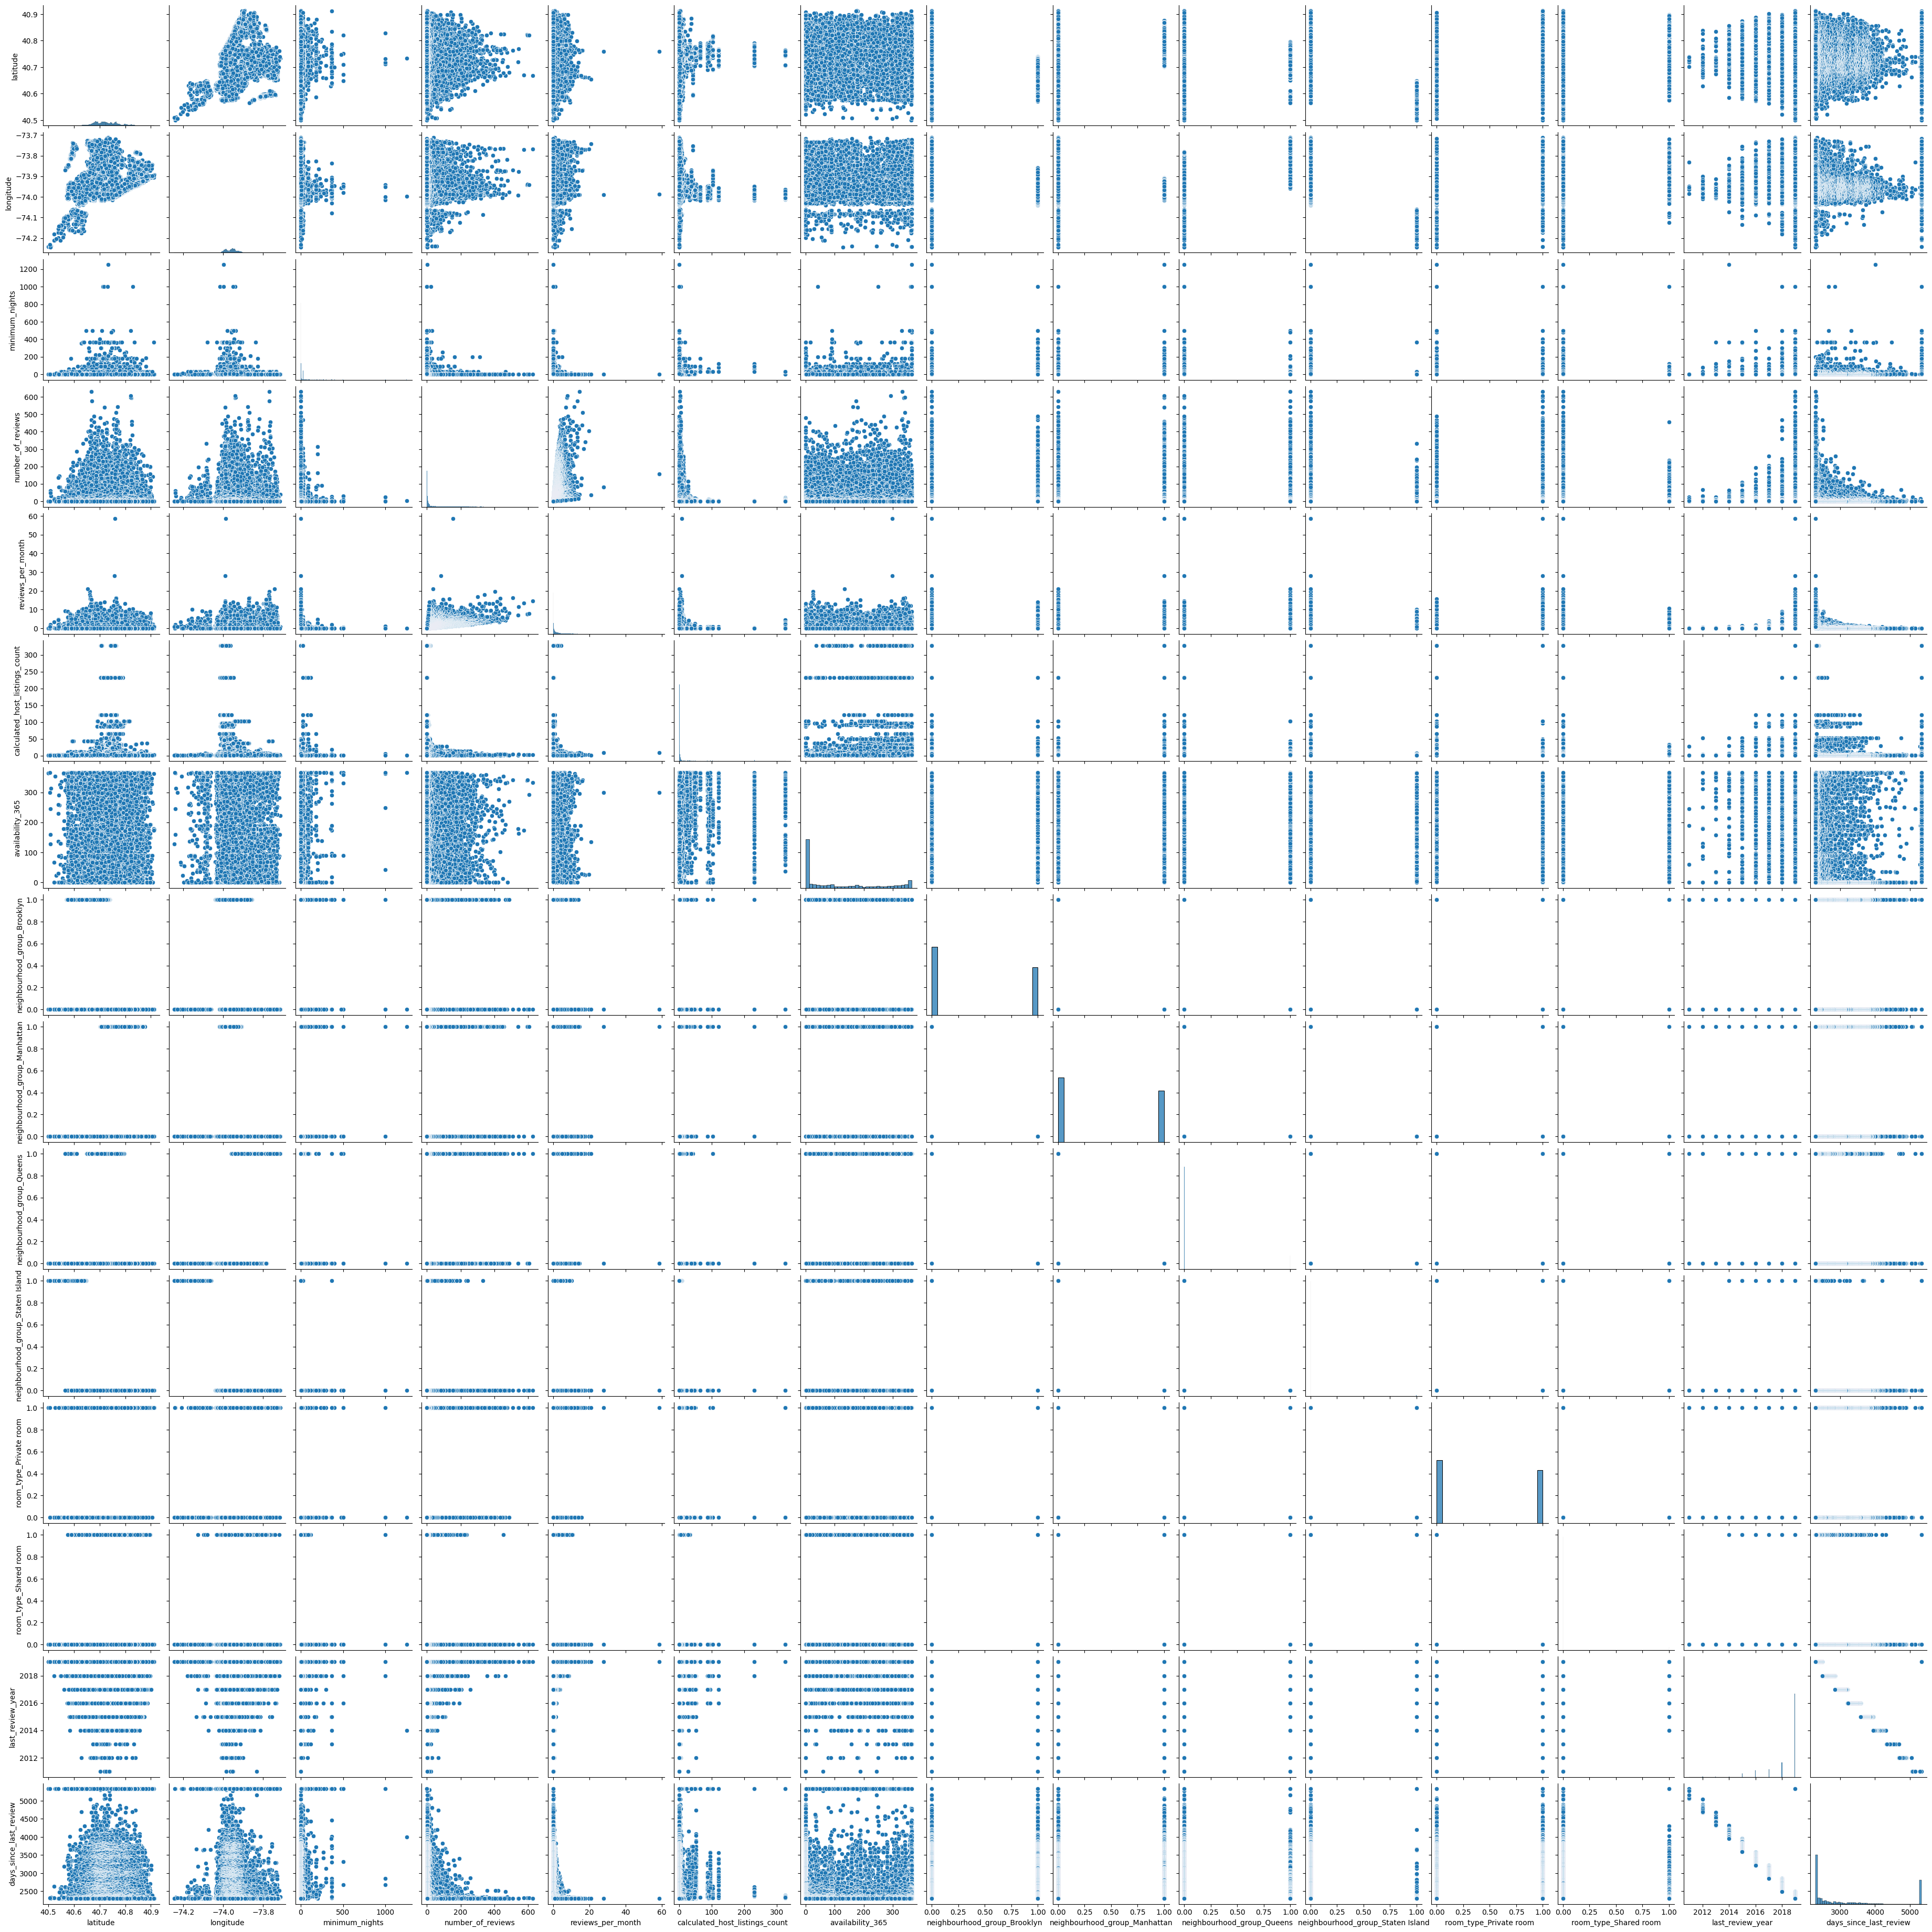

In [139]:
sns.pairplot(X)
plt.show()

In [140]:
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,last_review_year,days_since_last_review
0,40.64749,-73.97237,1,9,0.21,6,365,1,0,0,0,1,0,2018.0,2564.0
1,40.75362,-73.98377,1,45,0.38,2,355,0,1,0,0,0,0,2019.0,2350.0
2,40.80902,-73.94190,3,0,0.00,1,365,0,1,0,0,1,0,2019.0,5326.0
3,40.68514,-73.95976,1,270,4.64,1,194,1,0,0,0,0,0,2019.0,2305.0
4,40.79851,-73.94399,10,9,0.10,1,0,0,1,0,0,0,0,2018.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,9,1,0,0,0,1,0,2019.0,5326.0
48891,40.70184,-73.93317,4,0,0.00,2,36,1,0,0,0,1,0,2019.0,5326.0
48892,40.81475,-73.94867,10,0,0.00,1,27,0,1,0,0,0,0,2019.0,5326.0
48893,40.75751,-73.99112,1,0,0.00,6,2,0,1,0,0,0,1,2019.0,5326.0


In [141]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [147]:
y.isna().sum()

np.int64(0)

In [153]:
y[20020]

np.int64(95)

In [154]:
X.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,last_review_year,days_since_last_review
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,1.090910,7.143982,112.781327,0.411167,0.443011,0.115881,0.007629,0.456611,0.023724,2018.434155,3143.678331
std,0.054530,0.046157,20.510550,44.550582,1.597283,32.952519,131.622289,0.492050,0.496747,0.320085,0.087009,0.498119,0.152190,1.091414,1169.872743
min,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,2302.000000
25%,40.690100,-73.983070,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,2321.000000
50%,40.723070,-73.955680,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,2488.000000
75%,40.763115,-73.936275,5.000000,24.000000,1.580000,2.000000,227.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2019.000000,3503.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2019.000000,5326.000000


In [160]:
X.duplicated().sum()

np.int64(1)

In [161]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           48895 non-null  float64
 1   longitude                          48895 non-null  float64
 2   minimum_nights                     48895 non-null  int64  
 3   number_of_reviews                  48895 non-null  int64  
 4   reviews_per_month                  48895 non-null  float64
 5   calculated_host_listings_count     48895 non-null  int64  
 6   availability_365                   48895 non-null  int64  
 7   neighbourhood_group_Brooklyn       48895 non-null  int64  
 8   neighbourhood_group_Manhattan      48895 non-null  int64  
 9   neighbourhood_group_Queens         48895 non-null  int64  
 10  neighbourhood_group_Staten Island  48895 non-null  int64  
 11  room_type_Private room             48895 non-null  int

In [164]:
X.nunique()

latitude                             19048
longitude                            14718
minimum_nights                         109
number_of_reviews                      394
reviews_per_month                      938
calculated_host_listings_count          47
availability_365                       366
neighbourhood_group_Brooklyn             2
neighbourhood_group_Manhattan            2
neighbourhood_group_Queens               2
neighbourhood_group_Staten Island        2
room_type_Private room                   2
room_type_Shared room                    2
last_review_year                         9
days_since_last_review                1764
dtype: int64

<Axes: xlabel='days_since_last_review', ylabel='Count'>

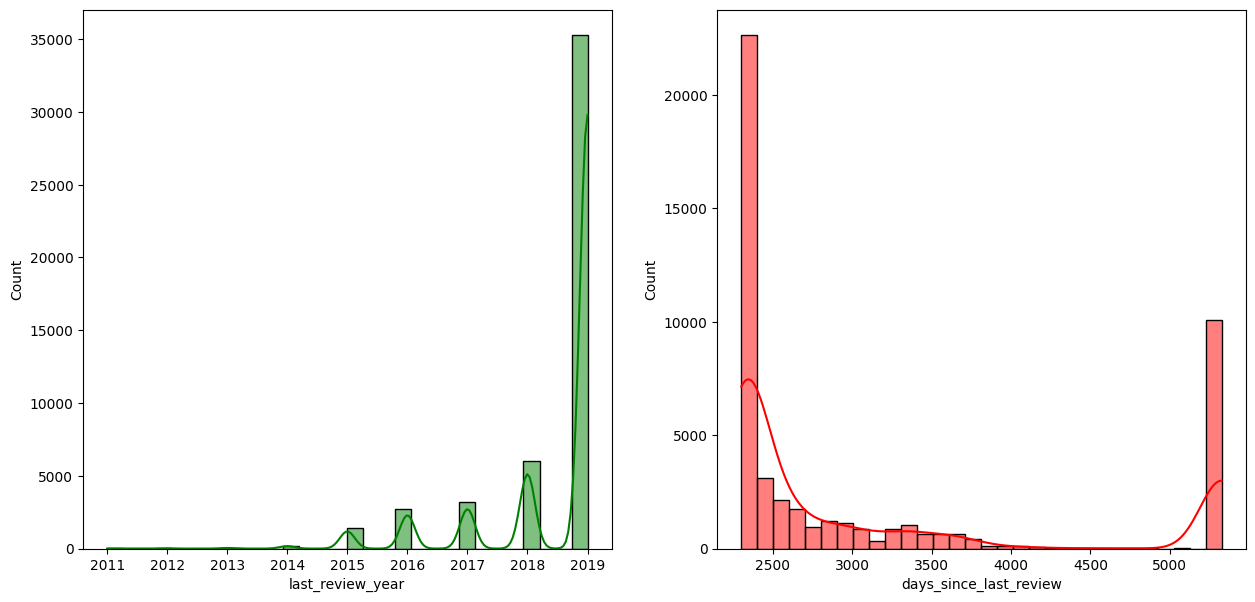

In [168]:
# Now we will do some EDA part here. 

fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = X, x = 'last_review_year', bins = 30, kde =True, color = 'g')
plt.subplot(122)
sns.histplot(data = X, x = 'days_since_last_review', bins = 30, kde =True, color = 'r')




In [ ]:
# Now working upoin building the model through the help of scikit learn library

